This notebook calculates reconstruction RMSE for the SOCAT-baseline (reconstructions are compared to the "model truth" of six members of the Large Ensemble Testbed), and we show the testbed spread using boxplots. We show the difference in RMSE between the full, train, test and unseen reconstruction.

This notebook was created by Thea Hatlen Heimdal, in collaboration with Julius Busecke and Abby Shaum

In [ ]:
# Modules

import pandas as pd
import xarray as xr
import numpy as np
import numpy.ma as ma
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'
%config InlineBackend.print_figure_kwargs = {'dpi':200, 'bbox_inches': 'tight'}
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
import scipy
import sklearn.linear_model 
import pickle
import cmocean as cm
import seaborn as sns

In [2]:
### Bring in 6 members of the LET - 2 members per model

path_LET = "/local/data/artemis/workspace/theimdal/saildrone/LET_pickle_files/members_LET_dict_SHORT.pickle" 

with open(path_LET,'rb') as handle:
    mems_dict = pickle.load(handle)

In [3]:
mems_dict

{'CESM': ['001', '002'], 'GFDL': ['01', '02'], 'CanESM2': ['r1r10', 'r1r9']}

### Bring in reconstructions for the SOCAT-baseline
#### Full, unseen, train and test sets

In [4]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/local/data/artemis/workspace/theimdal/saildrone/TEST/SOCAT/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_SOCAT_only_unseen = xr.concat(datasets_ens, dim='ensemble', join='override') 

In [5]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/local/data/artemis/workspace/theimdal/saildrone/TEST/SOCAT/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_full_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_SOCAT_only_full = xr.concat(datasets_ens, dim='ensemble', join='override') 

In [6]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/local/data/artemis/workspace/theimdal/saildrone/TEST/SOCAT/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_trained_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_SOCAT_only_train = xr.concat(datasets_ens, dim='ensemble', join='override') 

In [7]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/local/data/artemis/workspace/theimdal/saildrone/TEST/SOCAT/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_test_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_SOCAT_only_test = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Calculate RMSE

In [8]:
mean_vars = ['time','ylat', 'xlon', 'status']
ylat_slice = slice(-90,90)

RMSE_full = xr.ufuncs.sqrt(((ds_SOCAT_only_full.diff('status'))**2).sel(ylat=ylat_slice,time=slice('1982', '2016')).mean(mean_vars))
RMSE_unseen = xr.ufuncs.sqrt(((ds_SOCAT_only_unseen.diff('status'))**2).sel(ylat=ylat_slice,time=slice('1982', '2016')).mean(mean_vars))
RMSE_train = xr.ufuncs.sqrt(((ds_SOCAT_only_train.diff('status'))**2).sel(ylat=ylat_slice,time=slice('1982', '2016')).mean(mean_vars))
RMSE_test = xr.ufuncs.sqrt(((ds_SOCAT_only_test.diff('status'))**2).sel(ylat=ylat_slice,time=slice('1982', '2016')).mean(mean_vars))

In [24]:
print(np.nanmean(RMSE_full))

11.150278494506182


In [25]:
print(np.nanmean(RMSE_unseen))

11.223708784678498


In [26]:
print(np.nanmean(RMSE_train))

2.3773800522745323


In [27]:
print(np.nanmean(RMSE_test))

8.898307885289006


In [9]:
RMSE_full_recon = RMSE_full.to_dataframe()
RMSE_unseen_recon = RMSE_unseen.to_dataframe()
RMSE_train_recon = RMSE_train.to_dataframe()
RMSE_test_recon = RMSE_test.to_dataframe()

In [10]:
SOCAT_rmse_full_reset = RMSE_full_recon.reset_index()
SOCAT_rmse_unseen_reset = RMSE_unseen_recon.reset_index()
SOCAT_rmse_train_recon= RMSE_train_recon.reset_index()
SOCAT_rmse_test_recon= RMSE_test_recon.reset_index()

In [11]:
SOCAT_rmse_full_set = SOCAT_rmse_full_reset.set_index(['ensemble','n_member','member'])
SOCAT_rmse_unseen_set = SOCAT_rmse_unseen_reset.set_index(['ensemble','n_member','member'])
SOCAT_rmse_train_set = SOCAT_rmse_train_recon.set_index(['ensemble','n_member','member'])
SOCAT_rmse_test_set = SOCAT_rmse_test_recon.set_index(['ensemble','n_member','member'])

In [12]:
rmse_SOCAT_full_final = SOCAT_rmse_full_set
rmse_SOCAT_unseen_final = SOCAT_rmse_unseen_set
rmse_SOCAT_train_final = SOCAT_rmse_train_set
rmse_SOCAT_test_final = SOCAT_rmse_test_set

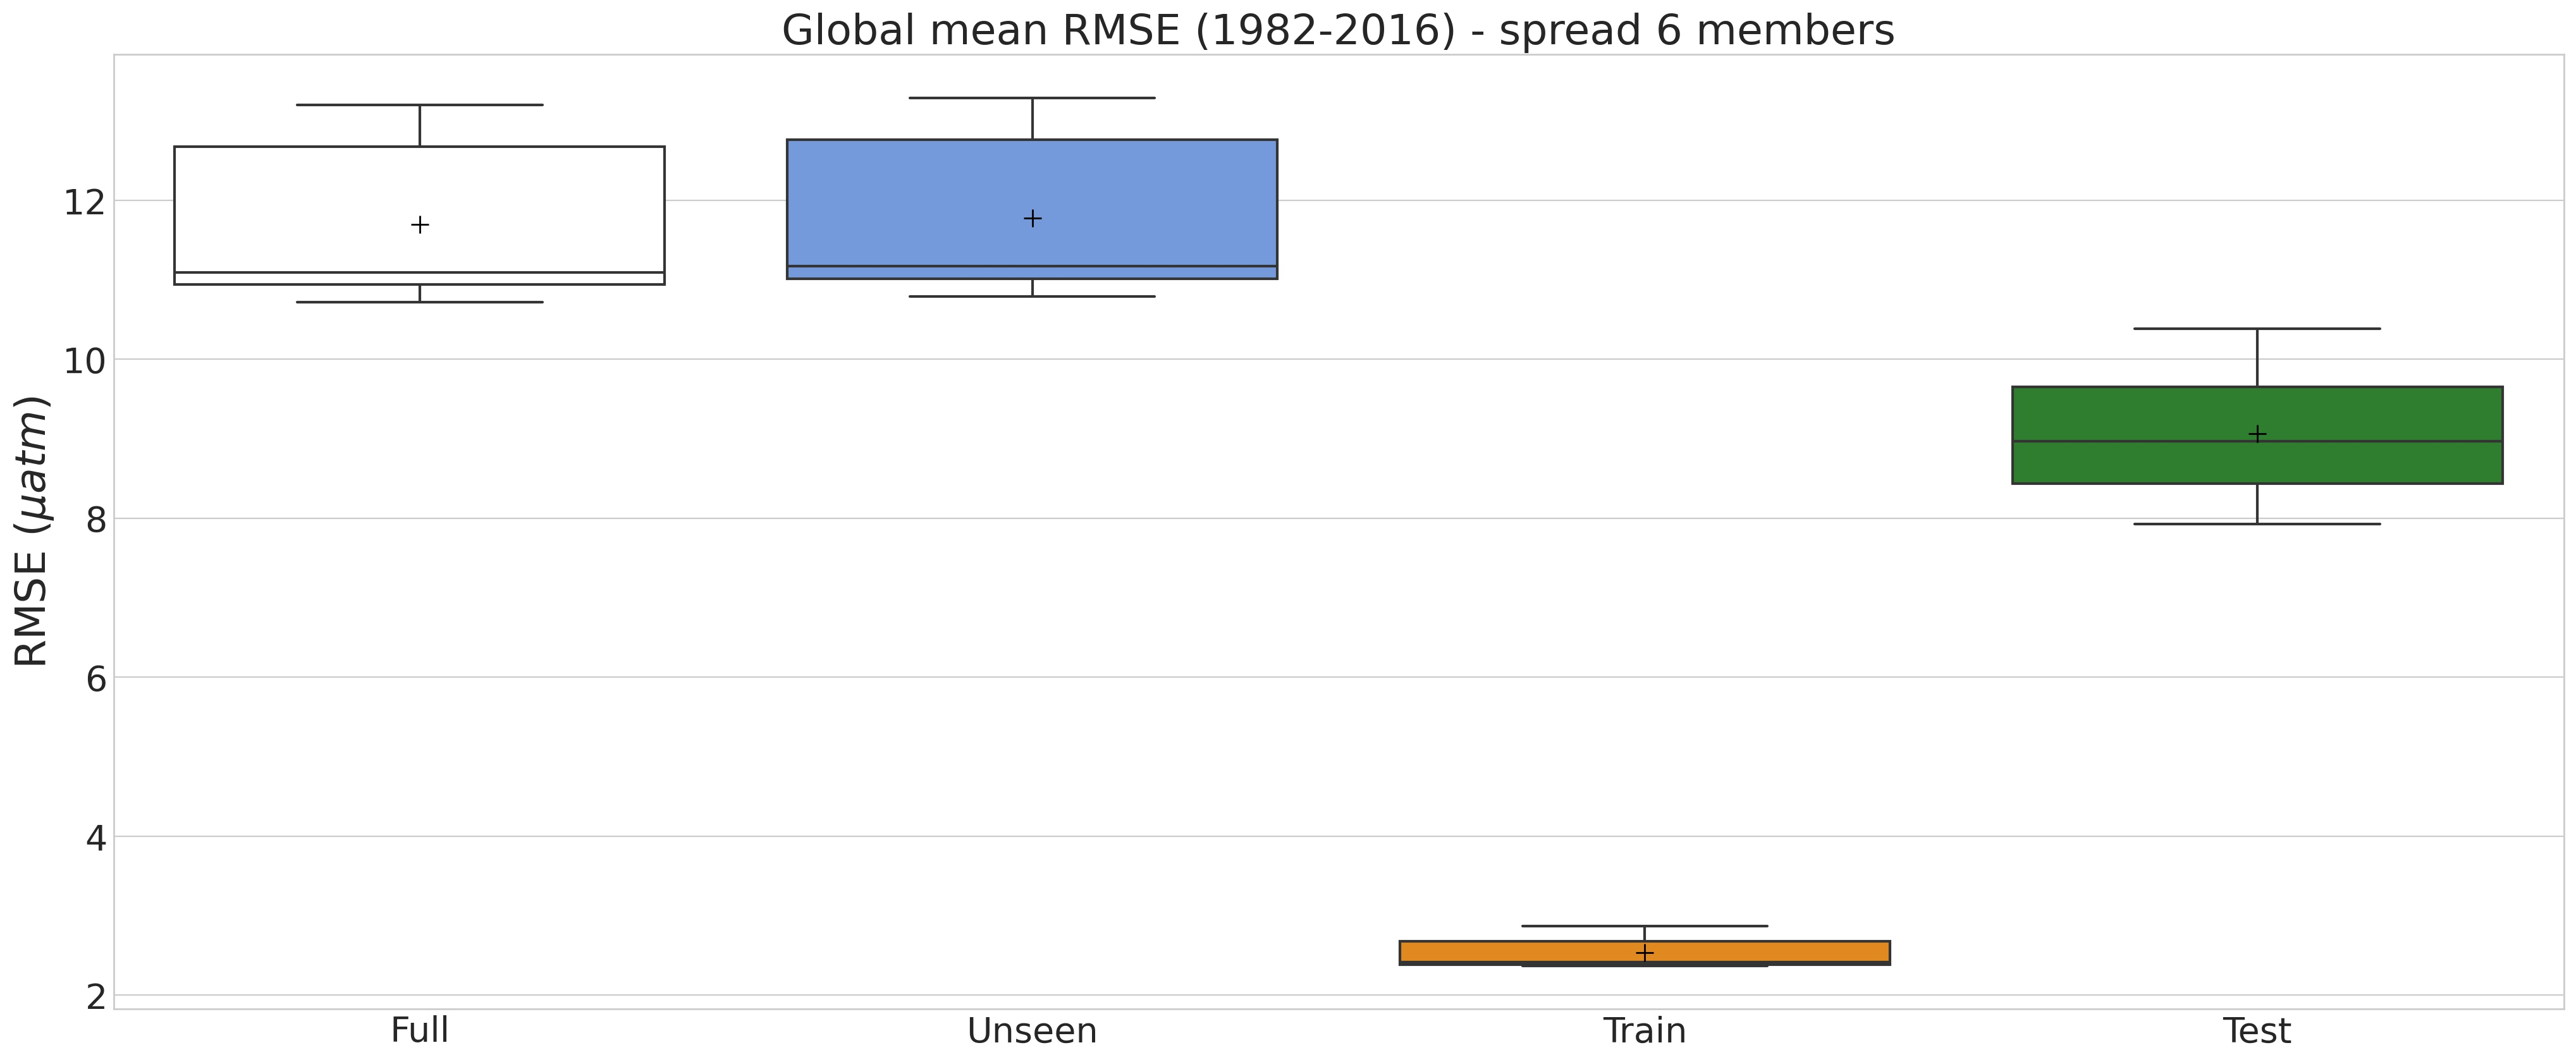

In [16]:
colors = ['white','cornflowerblue', 'darkorange','forestgreen']
labels = ['Full','Unseen','Train','Test']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [rmse_SOCAT_full_final, rmse_SOCAT_unseen_final, rmse_SOCAT_train_final, rmse_SOCAT_test_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('Global mean RMSE (1982-2016) - spread 6 members', fontsize= 24)
    plt.ylabel(f'RMSE ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1,2,3], fontsize = 20, labels = labels)
    plt.yticks(fontsize = 20)
    #plt.yticks([7,8,9,10,11,12,13,14],fontsize = 20)
    
#fig.savefig("/home/theimdal/RMSE_boxplot_train_test.jpg",dpi=300, bbox_inches="tight")